In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cauchy_simulations import ModifiedCauchyLiquidityProfile, SymmetricDiscretizedModel, to_bps_tick, from_bps_tick

In [2]:
# closest to Curve A=250
C = 10.0  # total liquidity parameter
GAMMA = 0.013  # scale parameter of 120 bps
PEG_MULTIPLE = 32  # peg of 4160 bps
PEG = PEG_MULTIPLE * GAMMA

R = 3  # 2**R ticks per segment of discretized model
MAX_TICK = 887272
TICK_SPACING = 10  # step size between ticks in arrays

In [3]:
# get rid of modulus from tick spacing
MAX_TICK = MAX_TICK - MAX_TICK % TICK_SPACING
MAX_TICK

887270

In [4]:
def modified_c(c: int, pm: int) -> float:
    return c / (1 + 1/(1 + pm**2))

In [5]:
MC = modified_c(C, PEG_MULTIPLE)
mclp = ModifiedCauchyLiquidityProfile(c=MC, gamma=GAMMA, peg=PEG)

In [6]:
bps_ticks = np.arange(start=-MAX_TICK, stop=MAX_TICK, step=TICK_SPACING)
df = pd.DataFrame(data={'bps_ticks': bps_ticks, 'log_ticks': from_bps_tick(bps_ticks)})

In [7]:
# plot liquidity profile over ticks
df[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]'] = mclp.at(df['log_ticks'])

In [8]:
df

,bps_ticks,log_ticks,"ml(t) [c=9.990253411306043, g=0.013, peg=0.416]"
0,-887270,-88.722564,0.238654
1,-887260,-88.721564,0.238654
2,-887250,-88.720564,0.238654
3,-887240,-88.719564,0.238654
4,-887230,-88.718564,0.238654
...,...,...,...
177449,887220,88.717564,0.238654
177450,887230,88.718564,0.238654
177451,887240,88.719564,0.238654
177452,887250,88.720564,0.238654


<Axes: xlabel='bps_ticks'>

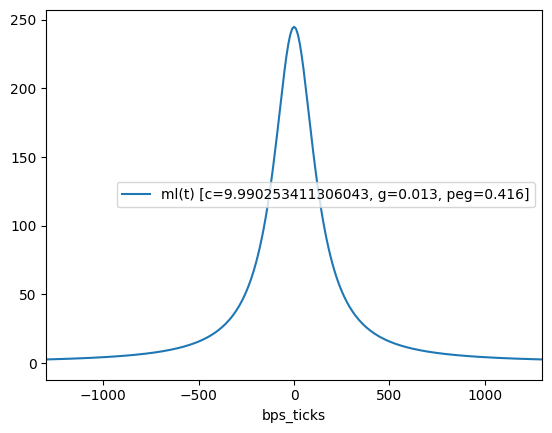

In [9]:
df.plot(x='bps_ticks', y=f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', xlim=(to_bps_tick(-10 * GAMMA), to_bps_tick(10 * GAMMA)))

In [10]:
# discretized symmetric model
symm = SymmetricDiscretizedModel(t_max=from_bps_tick(MAX_TICK), t_spacing=0.001, lp=mclp, s=GAMMA, r=R)

In [11]:
symm.n()

12

In [12]:
symm.segments()

[array([53.248, 26.624]),
 array([26.624, 13.312]),
 array([13.312,  6.656]),
 array([6.656, 3.328]),
 array([3.328, 1.664]),
 array([1.664, 0.832]),
 array([0.832, 0.416]),
 array([0.416, 0.208]),
 array([0.208, 0.104]),
 array([0.104, 0.052]),
 array([0.052, 0.026]),
 array([0.026, 0.013]),
 array([0.013, 0.   ])]

In [13]:
symm.ticks()

[53.248,
 49.919999999999995,
 46.59199999999999,
 43.26399999999999,
 39.935999999999986,
 36.60799999999998,
 33.27999999999998,
 29.951999999999977,
 26.624,
 24.959999999999997,
 23.295999999999996,
 21.631999999999994,
 19.967999999999993,
 18.30399999999999,
 16.63999999999999,
 14.975999999999988,
 13.312,
 12.479999999999999,
 11.647999999999998,
 10.815999999999997,
 9.983999999999996,
 9.151999999999996,
 8.319999999999995,
 7.487999999999994,
 6.656,
 6.239999999999999,
 5.823999999999999,
 5.407999999999999,
 4.991999999999998,
 4.575999999999998,
 4.1599999999999975,
 3.743999999999997,
 3.328,
 3.1199999999999997,
 2.9119999999999995,
 2.7039999999999993,
 2.495999999999999,
 2.287999999999999,
 2.0799999999999987,
 1.8719999999999986,
 1.664,
 1.5599999999999998,
 1.4559999999999997,
 1.3519999999999996,
 1.2479999999999996,
 1.1439999999999995,
 1.0399999999999994,
 0.9359999999999993,
 0.832,
 0.7799999999999999,
 0.7279999999999999,
 0.6759999999999998,
 0.62399999999

In [14]:
np.array([int(to_bps_tick(t)) for t in symm.ticks()])

array([532506, 499224, 465943, 432661, 399379, 366098, 332816, 299534,
       266253, 249612, 232971, 216330, 199689, 183049, 166408, 149767,
       133126, 124806, 116485, 108165,  99844,  91524,  83204,  74883,
        66563,  62403,  58242,  54082,  49922,  45762,  41602,  37441,
        33281,  31201,  29121,  27041,  24961,  22881,  20801,  18720,
        16640,  15600,  14560,  13520,  12480,  11440,  10400,   9360,
         8320,   7800,   7280,   6760,   6240,   5720,   5200,   4680,
         4160,   3900,   3640,   3380,   3120,   2860,   2600,   2340,
         2080,   1950,   1820,   1690,   1560,   1430,   1300,   1170,
         1040,    975,    910,    845,    780,    715,    650,    585,
          520,    487,    455,    422,    390,    357,    325,    292,
          260,    243,    227,    211,    195,    178,    162,    146,
          130,    113,     97,     81,     65,     48,     32,     16])

In [15]:
# compare with discretized model of distribution
df[f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'] = df['log_ticks'].apply(lambda t: symm.at(t))

In [16]:
df

,bps_ticks,log_ticks,"ml(t) [c=9.990253411306043, g=0.013, peg=0.416]","dml(t) [c=9.990253411306043, g=0.013, peg=0.416]"
0,-887270,-88.722564,0.238654,0.238663
1,-887260,-88.721564,0.238654,0.238663
2,-887250,-88.720564,0.238654,0.238663
3,-887240,-88.719564,0.238654,0.238663
4,-887230,-88.718564,0.238654,0.238663
...,...,...,...,...
177449,887220,88.717564,0.238654,0.238663
177450,887230,88.718564,0.238654,0.238663
177451,887240,88.719564,0.238654,0.238663
177452,887250,88.720564,0.238654,0.238663


<Axes: xlabel='bps_ticks'>

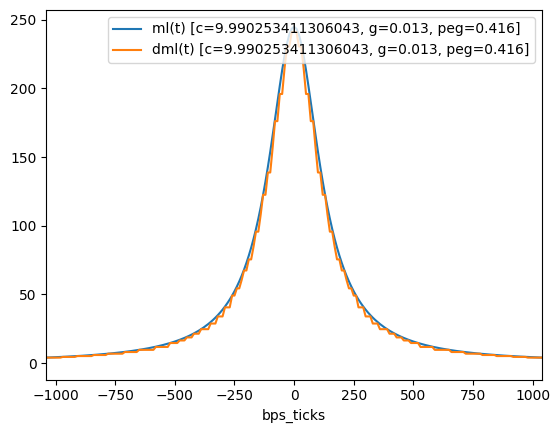

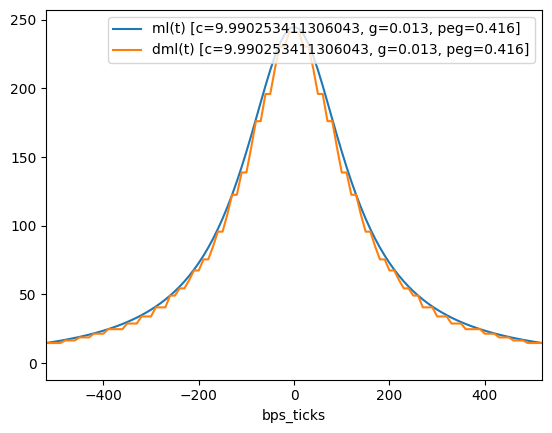

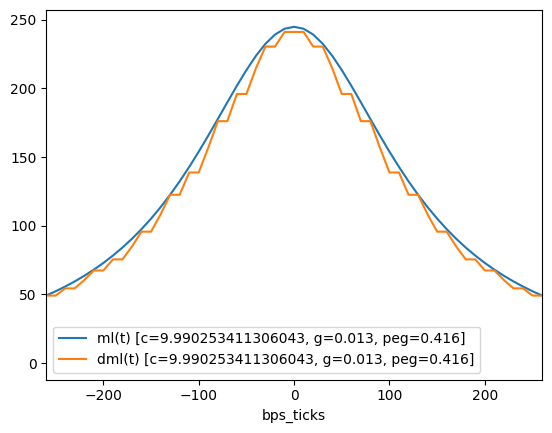

In [17]:
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-8 * GAMMA), to_bps_tick(8 * GAMMA)))
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-4 * GAMMA), to_bps_tick(4 * GAMMA)))
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-2 * GAMMA), to_bps_tick(2 * GAMMA)))

<Axes: xlabel='bps_ticks'>

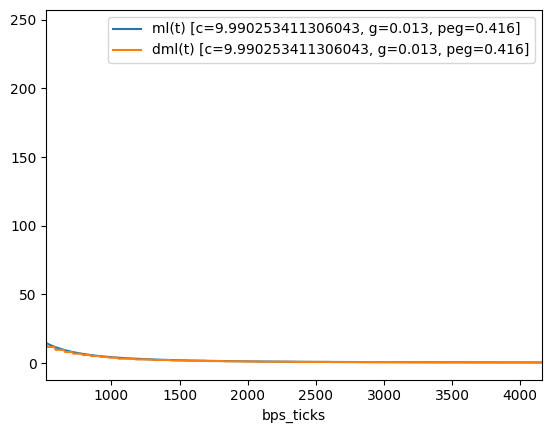

In [18]:
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(4 * GAMMA), to_bps_tick(32 * GAMMA)))

In [19]:
# 3% shaved off vs continuous when discretizing
symm.reserves_x(0)

2.595163565942192

In [20]:
symm.reserves_y(0)

2.595163565942192

In [21]:
mclp.reserves_x(0, tmax=symm.t_max)

2.6797439494088815

In [22]:
mclp.reserves_y(0, tmax=symm.t_max)

2.6797439494088815

In [23]:
top = 40000 # bps
width = TICK_SPACING
bps_ticks_in_ranges = np.array([width * i for i in range((top + width) // width)])
df_w_ranges = pd.DataFrame(data={
    'bps_ticks': bps_ticks_in_ranges,
    'log_ticks': from_bps_tick(bps_ticks_in_ranges),
    'price': np.exp(from_bps_tick(bps_ticks_in_ranges)),
    'price^{-1}': np.exp(-from_bps_tick(bps_ticks_in_ranges))
})